# Projet MOGPL

In [1]:
import numpy as np
import pydot
import graphviz as gv
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import re
from operator import itemgetter
import gurobipy as gp
from gurobipy import *
import time

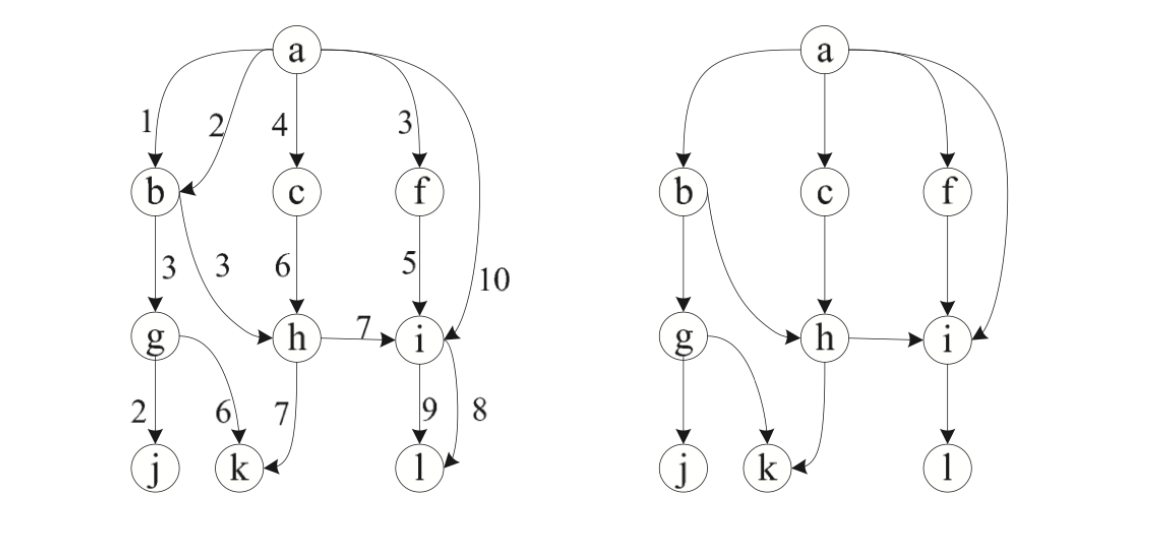

## Question 1

### Assertion 1:

Soit P1= ( (a,b,2,1) , (b,g,3,1) )
P1 est chemin un chemin d'arrivée au plus-tôt de a à g.

On considère le sous chemin préfixe de P1, P2=( (a,b,2,1) )

P2 n'est pas un chemin d'arrivée au plus tôt car fin(P2) = 3 or:
    min{fin(P') : P' ∈ P(a, b, [0,3])} = 2
    
Un chemin d'arrivée au plus tôt est dans ce cas P3 = ((a, b, 1, 1)), fin(P3) = 2
            

**Donc un sous-chemin préfixe d'un chemin d'arrivée au plus tôt peut ne pas être un chemin d'arrivée au plus tôt.**


### Assertion 2:

Soit P1 = ((f, i, 5, 1), (i, l, 8, 1)).
P1 est un chemin de départ au plus tard de f a l.

On considère le sous-chemin postfixe de P1, P2 = ((i, l, 8, 1)).

P2 n'est pas un chemin de départ au plus tard car debut(P2) = 8.
Or max{debut(P') : P' ∈ P(i, l, [0,10])} = 9
             
Un chemin de départ au plus tard est dans ce cas P3 = ((i, l, 19, 1)), début(P3) = 9

**Donc un sous-chemin postfixe d'un chemin de départ au plus tard peut ne pas être un chemin de départ au plus tard.**


### Assertion 3:

Soit P1 = ((a, c, 4, 1), (c, h, 6, 1), (h, k, 7, 1))

P1 est un chemin le plus rapide de a a k.

On considère le sous-chemin de P1, P2 = ((a, c, 4, 1), (c, h, 6, 1))

P2 n'est pas un chemin le plus rapide car durée(P2) = 7-4 = 3 or min{durée(P') : P' ∈ P(a, h, [0,7])} = 2

Un chemin le plus rapide est dans ce cas P3 = ((a, b, 2, 1), (b, h, 3, 1)), durée(P3) = 4-2 = 2

**Donc un sous-chemin d'un chemin le plus rapide peut ne pas être un chemin le plus rapide.**

### Assertion 4:

Soit P1 = ((a, f, 3, 1), (f, i, 5, 1), (i, l, 8, 1)).

P1 est un chemin le plus court de a a l.

On considère le sous-chemin de P1, P2 = ((a, f, 3, 1), (f, i, 5, 1)).

P2 n'est pas un chemin le plus court car dist(P2) = 1+1 = 2 or min{dist(P') : P' ∈ P(a, i, [0,11])} = 1.

Un chemin le plus court est dans ce cas P3 = ((a, i, 10, 1)), dist(P3) = 1

**Donc un sous-chemin d'un chemin le plus court peut ne pas être un chemin le plus court.**


## Question 2

Nous allons travailler sur des graphes orientés **sans circuits**. 
On peut donc gagner à utiliser cette propriété lors du choix des algorithmes
que nous allons implémenter.

compléxité des différents algos à notre disposition, pour un graphe (V,E):<br>
*  tri topologique puis relachement des arcs : O(|V|+|E|).
* Bellman-Ford: O(|V|*|E|)
* Djikstra O( V * log (V) + |E| )

### implémentation des différents algortihmes:

Pour tous les algorithmes nous avons choisi d'implémenter un algorithme
qui fait d'abord un tri topologique des sommets du graphe puis les relâche afin
de calculer le coût des différents trajets possibles.

* Il n'est pas nécéssaire d'implémenter l'algorithme de **Bellman-Ford** ou **Djikstra** 
car nous n'avons **pas de cycles** dans le graphe.

* Une autre raison de ne pas implémenter **Bellman-Ford** est qu'il n'y a aucun arc de poids
négatif sur les graphs étudiés ici.

* Enfin **la compléxité** de l'algorithme que nous avons choisi **est linéaire** contrairement
à la compléxité des deux autres algorithmes envisagés.

Pour chaque problème on considérera le Graphe $G'$ , étant le graphe $G$ transformé comme proposé
dans l'énnoncé.

**1. Chemin d'arrivée au plus tôt:**

Pour traiter le problème du chemin d'arrivée au plus tôt nous nous sommes inspirés de
la méthode des pénalités vue précédemment en cours , dans le cadre de l'algorithme du
SIMPLEX.

Soit $e \in G$ le sommet d'arrivée choisi et $e_{i} \in G'$ l'ensemble des sommets d'arrivée à $e$ aux dates i. 
Pour tous les arcs entrant de $e_{i}$ resp. ($v,e_{i},t,\lambda$) on modifie le poids de 
l'arc par: 

$$\lambda=\lambda+i*M$$

On a bien que plus $t$ est grand , plus l'arc est pénalisé. (il n'y a aucune date négative et
aucun poids négatif dans aucun cas la pénalité deviendrait un "bonus"). 
Dans notre cas on a fixé $M$ à $10000$ par soucis de simplicité mais une valeur correcte de M serait pour 
$Pmax_{G'}$ le poids maximal $\lambda$ d'un arc de $G'$ et $E_{G'}$ 
le nombre d'arcs de $G'$ :

$$M_{G'}=Pmax_{G'}*E_{G'}*10$$
                      
On a bien que la $M_{G'}$ a un score de distance bien superieur au plus court chemin
même dans le cas ou il y aurait un grand nombre d'arcs.                     

**2. Chemin de départ au plus tard.**

Pour ce problème nous avons appliqué la même méthode que pour le problème précédent cependant
on a pénalisé tous les arcs sortants des sommets $s_i$ avec $t_{max}$ la 
dernière date de départ partant de $s$ par:

$$\lambda=\lambda+(t_{max}-i)*M$$

on a bien que plus $i$ est petit, plus $t_{max}-i$ est grand et l'arc pénalisé.
    

**3. Chemin le plus rapide.**

La procédure reste inchangée par rapport à ce que nous avons fait avant. Cependant nous avons changé la fonction de cout entre les différents arcs. Avant le coût d'un arc était déterminé par sa *distance* , et dans ce cas il est déterminé par *son temps de trajet.*

**4. Plus court chemin.**

Le plus court chemin est le même algorithme que celui utilisé précédemment , sans aucune pénalité
ni changement de cout.

## Question 4 -  implémentation

### utilitaires

In [2]:
def lire_fichier(nom_fichier):
    with open(nom_fichier,"r") as f:
        contenu=list(f)
        g=dict()
       
        
        nb_sommets=int(re.findall("\d+", contenu[0])[0])
        nb_arcs=int(re.findall("\d+", contenu[1])[0])
        
        
        
        
        for i in range(2,len(contenu)):
            tmp_l=contenu[i].strip()
            if tmp_l[:6]=="sommet":
                l_infos= tmp_l[7:].split(' ')
                g[l_infos[0]]=[]
                continue
             
            if tmp_l[:3]=="arc":
                
                l_infos= tmp_l[5:].split(',')
               
                u=l_infos[0].replace(' ','')
                v=l_infos[1].replace(' ','')
                
                t=int(re.findall("\d+", l_infos[2])[0])
                lamb=int(re.findall("\d+", l_infos[3])[0])
                g[u].append((v,t,lamb))
        return g
                
def transformaion_graphe(g):
    new_g=dict()
    
    for s in g:
        l_tmp=g[s]
        
        
        
        for v in l_tmp:
            new_id_in=(v[0],v[1]+v[2])
            new_id_out=((s,v[1]))
            
            
            
            if not new_id_in in new_g:
                new_g[new_id_in]=[]
                
            if not new_id_out in new_g:
                new_g[new_id_out]=[]
                
                
            new_g[new_id_out].append([v[0],v[1]+v[2],v[2]])
            
    
    tmp_dict=dict()
    for k in new_g:
        if k[0] not in tmp_dict:
            tmp_dict[k[0]]=[k]
        else:
            tmp_dict[k[0]].append(k)
    
    for k in tmp_dict:
        tmp_l=tmp_dict[k]
        tmp_l=sorted(tmp_l, key=lambda tup: tup[1])
        for j  in range(0,len(tmp_l)-1):
            tmp_e=[k,tmp_l[j+1][1],0]
            new_g[tmp_l[j]].append(tmp_e)
   
    return new_g
    


def networkx_to_graphviz_G(tmp_g):

    
    h = gv.Digraph()
    #h.graph_attr['ratio'] = 'auto'
    for u, d in tmp_g.nodes(data = True):
        h.node(str(u))
    for u, v, d in tmp_g.edges(data = True):
        h.edge(str(u), str(v),label=str(d['t']))
    return h

def networkx_to_graphviz_G_prime(tmp_g):

    
    h = gv.Digraph()
    #h.graph_attr['ratio'] = 'auto'
    for u, d in tmp_g.nodes(data = True):
        h.node(str(u))
    for u, v, d in tmp_g.edges(data = True):
        
        h.edge(str(u), str(v),label=str(d['weight']))
    return h

   

def afficher_g(graphe):
    G = nx.DiGraph()
    data_type=0
    for k in graphe:
        G.add_node(k,label=k)
    for k in  graphe:
        tmp_l=graphe[k]
        if isinstance(k,tuple):
            data_type=1
            for i in tmp_l:
                
                G.add_edge(k,(i[0],i[1]),t=i[1],weight=i[2])
        else:
            for i in tmp_l:
                G.add_edge(k,i[0],t=i[1],weight=i[2])
    
    if data_type==0:
        tmp=networkx_to_graphviz_G(G)
    else:
        tmp=networkx_to_graphviz_G_prime(G)
    
    filename = 'graphs_generes/example_directed_graph'
    fileformat = 'png'
    tmp.render(filename, format = fileformat, cleanup = True)
    img = mpimg.imread("graphs_generes/example_directed_graph.png")
    plt.imshow(img)     

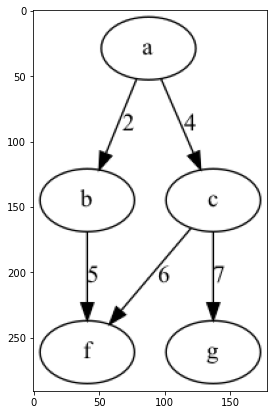

In [3]:
plt.rcParams["figure.figsize"] = (7,7)
g=lire_fichier("tests/graph_1_test.txt")
afficher_g(g)
#attention les arcs parallèles ne s'affichent pas , mais ils sont biens présents sur le graphe*

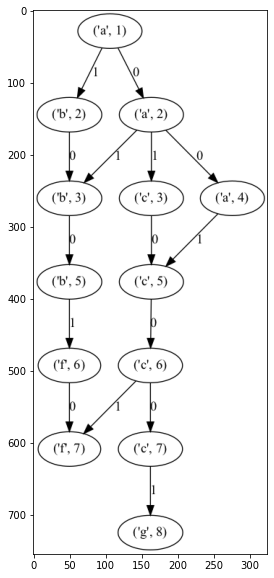

In [4]:
plt.rcParams["figure.figsize"] = (10,10)
new_g=transformaion_graphe(g)
afficher_g(new_g)

In [5]:
def tri_topologique(g,start):
    s_inutiles=True
    Vin={ k:0 for k in g}
    for k in g:  
        for s in g[k]:
            etiquette=(s[0],s[1])
            Vin[etiquette]+=1
    s_indeg_0=[]
    for k in g:
        if Vin[k]==0:
            s_indeg_0.append(k)
    
    res=[]
    while(len(s_indeg_0)>0):
        tmp_s=s_indeg_0.pop()
        if tmp_s[0]==start and s_inutiles:
            s_inutiles=False
            
            
        if not s_inutiles :
            res.append(tmp_s)
        
        for voisin in g[tmp_s]:
            
            tmp_id_voisin=(voisin[0],voisin[1])
            Vin[tmp_id_voisin]-=1
            if Vin[tmp_id_voisin]==0:
                s_indeg_0.append(tmp_id_voisin)
        
    return res

def relacher(src,dest,cout,chemin,d):
    if (d[src]==-1):
        return
    if (d[dest]==-1) or ( d[dest]> (d[src]+cout) ) :
        d[dest]=(d[src]+cout)
        chemin[dest]=[src]
    

def elimination_sommets_inutiles(start,tri_topo):
    for k in range(0,len(tri_topo)):
        if tri_topo[k][0]==start:
            tri_topo=tri_topo[k:]
            return tri_topo
    return tri_topo

def retrace_chemin(chemin,distances,start,end):
     #selection du sommet final
    dmin=-1
    indexmin=" "
    for k in distances:
        if k[0]==end:
            if (distances[k]<dmin or dmin==-1) and chemin[k]!=[]:
                dmin=distances[k]
                indexmin=k
    if dmin==-1:
        return []
    #retracage du meilleur parcours
    chemin_res=[]
    
    while chemin[indexmin]!=[] and chemin[indexmin][0]!=start:
        
        if chemin_res==[] or chemin_res[-1][0]!=indexmin[0]:
            chemin_res.append(indexmin)
        indexmin=chemin[indexmin][0]
   
    if indexmin[0]==start and chemin_res[-1][0]!=start:
        chemin_res.append(indexmin)
    
    return chemin_res[::-1]



## 1. Chemin d'arrivée au plus tôt.

In [6]:
def chemin_arrivee_plus_tot_pénalités(g,start,end):
    chemin=dict()
    distances=dict()
    
    for k in g:
        chemin[k]=[]
        if k[0]==start :
            distances[k]=0
        else:
            distances[k]=-1
            
        for j in g[k]:
            if j[0]==end:
                j[2]=j[2]+j[1]*1000
            
    
        
    
    
    tri_topo=tri_topologique(g,start)
    #tri_topo=elimination_sommets_inutiles(start,tri_topo)
    
    if (tri_topo==[]):
        return []
    
    for k in tri_topo:    
        for s in g[k]:
            tmp_dst=(s[0],s[1])
            relacher(k,tmp_dst,s[2],chemin,distances)
    
    return retrace_chemin(chemin,distances,start,end)

In [7]:
new_g=transformaion_graphe(g)
chemin=chemin_arrivee_plus_tot_pénalités(new_g,'a','f')
print(chemin)

[('a', 2), ('b', 5), ('f', 6)]


## 2. Chemin avec départ au plus tard

In [8]:
def chemin_le_plus_tard(g,start,end,date_limite):
    chemin=dict()
    distances=dict()
    s_starts=[]
    nb_starts=0
    
    for k in g:
        chemin[k]=[]
        if k[0]==start:
            s_starts.append(k)
            nb_starts=max(nb_starts,k[1])
            distances[k]=0
        else:
            distances[k]=-1
    nb_starts+=2
    for k in s_starts:
        
        for j in g[k]:
            j[2]=10000*(nb_starts-j[1])
            if k[1]>date_limite:
                j[2]=100000000000*nb_starts;
                
            
    
    
    tri_topo=tri_topologique(g,start)
    #tri_topo=elimination_sommets_inutiles(start,tri_topo)
    
    if (tri_topo==[]):
        return []
    
    for k in tri_topo:
        for s in g[k]:
            tmp_dst=(s[0],s[1])
            relacher(k,tmp_dst,s[2],chemin,distances)
    chemin=retrace_chemin(chemin,distances,start,end)
    
    if chemin!=[] and chemin[0][1]<=date_limite:
        return chemin
    return []

In [9]:
new_g=transformaion_graphe(g)
chemin=chemin_le_plus_tard(new_g,'a','f',10)
print(chemin)

[('a', 4), ('c', 6), ('f', 7)]


## 3. Chemin le plus rapide.

In [10]:
def chemin_le_plus_rapide(g,start,end):
    chemin=dict()
    distances=dict()
    
    for k in g:
        chemin[k]=[]
        if k[0]==start :
            distances[k]=0
        else:
            distances[k]=-1
            
    
    tri_topo=tri_topologique(g,start)
    #tri_topo=elimination_sommets_inutiles(start,tri_topo)
    
    if (tri_topo==[]):
        return []
    
    for k in tri_topo:    
        for s in g[k]:
            tmp_dst=(s[0],s[1])
            relacher(k,tmp_dst,s[1]-k[1],chemin,distances)
    
    return retrace_chemin(chemin,distances,start,end)


In [11]:
new_g=transformaion_graphe(g)
chemin=chemin_le_plus_rapide(new_g,'a','g')
print(chemin)

[('a', 4), ('c', 7), ('g', 8)]


## 4. Chemin le plus court.

In [12]:
def chemin_le_plus_court(g,start,end):
    chemin=dict()
    distances=dict()
    
    for k in g:
        chemin[k]=[]
        if k[0]==start :
            distances[k]=0
        else:
            distances[k]=-1
            
    
    tri_topo=tri_topologique(g,start)
    #tri_topo=elimination_sommets_inutiles(start,tri_topo)
    
    if (tri_topo==[]):
        return []
    
    for k in tri_topo:    
        for s in g[k]:
            tmp_dst=(s[0],s[1])
            relacher(k,tmp_dst,s[2],chemin,distances)
    
    return retrace_chemin(chemin,distances,start,end)


In [13]:
new_g=transformaion_graphe(g)
chemin=chemin_le_plus_court(new_g,'a','g')
print(chemin)

[('a', 4), ('c', 7), ('g', 8)]


## Question 5 - Gurobi

In [14]:
def chemin_le_plus_court_gurobi(g, start, end):
    m = gp.Model('Shortest_Path')
    m.Params.LogToConsole=0
    s_to_i = dict()
    links = tuplelist()
    cost  = {}
    origin=0
    destination=0
    ori_val=GRB.INFINITY
    dest_val=0
    
    for i, k in enumerate(g):
        s_to_i[(k[0],k[1])]=i
    
    for i, k in enumerate(g):
        if((k[0]==start) and (k[1]<ori_val)):
            origin=i
            ori_val=k[1]
        if((k[0]==end) and (k[1]>dest_val)):
            destination=i
            dest_val=k[1]
            
        for arc in g[k]:
            links.append((i,s_to_i[(arc[0], arc[1])]))
            cost[i,s_to_i[(arc[0], arc[1])]] = arc[2]
    
    x = m.addVars(links, obj=cost, name ="flow")
    
    m.update()
    m.ModelSense = GRB.MINIMIZE

    
    for i, k in enumerate(g):
        m.addConstr( sum(x[i,j] for i,j in links.select(i, '*')) - sum(x[j,i] for j,i in links.select('*',i)) == 
                         (1 if i==origin else -1 if i==destination else 0 ),'node%s_' % i )

    m.optimize() 
    res=[]
    if m.status == GRB.Status.OPTIMAL:
        #print('The final solution is:')
    
        for i, k in enumerate(g):
            for arc in g[k]:
                if(x[i,s_to_i[(arc[0], arc[1])]].x > 0):
                    res.append(str(k)+" "+str(arc))
                    #print(k, arc, x[i,s_to_i[(arc[0], arc[1])]].x)
    return res

In [15]:
new_g=transformaion_graphe(g)
res_gurobi=chemin_le_plus_court_gurobi(new_g, 'a', 'g')
for k in res_gurobi:
    print(k)

Set parameter Username
Academic license - for non-commercial use only - expires 2022-01-26
('a', 1) ['a', 2, 0]
('a', 2) ['c', 3, 1]
('c', 3) ['c', 5, 0]
('c', 5) ['c', 6, 0]
('c', 6) ['c', 7, 0]
('c', 7) ['g', 8, 1]


In [16]:
#http://avinashu.com/tutorial/pythontutorial/shortest_path.html

## Question 6 - tests de Compléxité

### génération de graphs aléatoires pour les tests

In [17]:
plt.rcParams["figure.figsize"] = (10,10)
#sommets / arcs / étiquettes
def create_graph(nb_sommets,p_arcs):
    new_g=dict()
    cpt_arcs=0
    for k in range(nb_sommets):
        new_g[str(k)]=[]
        
    for i in range(nb_sommets):
        for j in range(i+1,min(i+int(nb_sommets/3.0),nb_sommets)):
            
            if np.random.uniform()<=p_arcs:
                new_g[str(i)].append((str(j),i+1,1))
                cpt_arcs+=1
        
        if new_g[str(i)]==[]:
            del new_g[str(i)]
                
    #print("sommets créés : ",len(new_g),"arcs créés:",cpt_arcs)
    return len(new_g),cpt_arcs,new_g

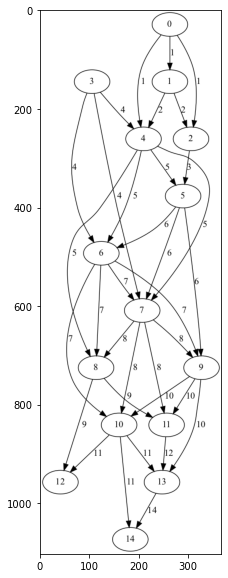

In [45]:
cpt_sommets,cpt_arcs,g_tmp=create_graph(15,0.700)
new_g_tmp=transformaion_graphe(g_tmp)
afficher_g(g_tmp)

In [19]:
chemin1=chemin_arrivee_plus_tot_pénalités(new_g_tmp,'4','11')
chemin2=chemin_le_plus_tard(new_g_tmp,'4','11',1000)
chemin3=chemin_le_plus_rapide(new_g_tmp,'4','11')
chemin4=chemin_le_plus_court(new_g_tmp,'1','12')
print(chemin1)
print(chemin2)
print(chemin3)
print(chemin4)


[('4', 5), ('8', 9), ('11', 10)]
[('4', 5), ('8', 9), ('11', 10)]
[('4', 5), ('8', 9), ('11', 10)]
[('1', 2), ('2', 3), ('6', 7), ('10', 11), ('12', 12)]


### Premier test: On fait varier la taille des graphes en gardant P constant

In [20]:
def test_complexite_sommets(p_arcs,pas,taillemax,nb_essais):
    res_nb_sommets=[]
    res_score=[]
    #res_taille_g=[]
    for k in range(20,taillemax+1,pas):
        t1=0
        t2=0
        t3=0
        t4=0 
        nb_arcs=0
        nb_sommets=0
        
        for j in range(nb_essais):
            G_tmp={}
            while (len(G_tmp)==0):
                cpt_sommets,cpt_arcs,G_tmp=create_graph(k,p_arcs)
            nb_arcs+=cpt_arcs
            nb_sommets+=cpt_sommets
            g_tmp=transformaion_graphe(G_tmp)
            
            tmp_start="9999999999999999"
            tmp_end="0"
            fdqsfdsq=0
            for u in G_tmp:
                
                if int(u[0])<=int(tmp_start[0]):
                    tmp_start=u
                    
            for u in G_tmp:
                if int(u[0])>=int(tmp_end[0]):
                    tmp_end=u
            
            #leng+=len(G_tmp)
            
    
            
            
            start = time.time()
            chemin_arrivee_plus_tot_pénalités(g_tmp,tmp_start,tmp_end)
            end = time.time()
            t1+=(end - start)
            
            start = time.time()
            chemin_le_plus_tard(g_tmp,tmp_start,tmp_end,10000)
            end = time.time()
            t2+=(end - start)
            
            start = time.time()
            chemin_le_plus_rapide(g_tmp,tmp_start,tmp_end)
            end = time.time()
            t3+=(end - start)
            
            start = time.time()
            chemin_le_plus_court(g_tmp,tmp_start,tmp_end)
            end = time.time()
            t4+=(end - start)
        
        res_score.append((t1/float(nb_essais),t2/float(nb_essais),t3/float(nb_essais),t4/float(nb_essais)))
        res_nb_sommets.append((nb_sommets/float(nb_essais))+(nb_arcs/float(nb_essais)))
        #res_taille_g.append(leng/float(nb_essais))
    
    l1="Chemin d'arrivée au plus tôt"
    l2="Chemin avec départ au plus tard"
    l3="Chemin le plus rapide"
    l4="Chemin le plus court"
    plt.plot(np.log(np.array(res_nb_sommets)),np.log(np.array(res_score)),label=[l1,l2,l3,l4])  
    #plt.plot(res_nb_sommets, res_taille_g)  # Plot some data on the (implicit) axes.
    plt.xlabel("nombre de sommets + nombre d arcs (log)")
    plt.ylabel('temps (s) (log)')
    plt.title("test des algos, (p="+str(p_arcs)+") ("+str(nb_essais)+" essais)")
    plt.legend()
    plt.grid()
    plt.savefig('graphiques/graphe_test_sommets')
    
    return (np.log(res_nb_sommets), np.log(np.array(res_score)))

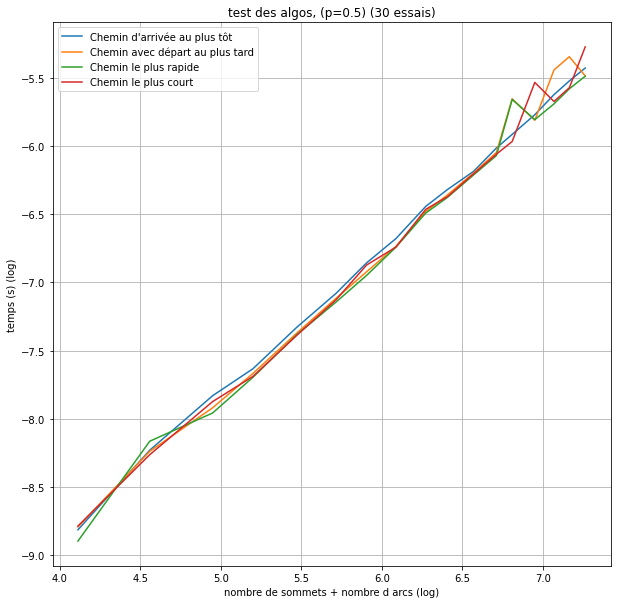

In [37]:
(nb_sommets,scores)=test_complexite_sommets(0.50,5,100,30)

### Estimation du coefficient directeur (si affine)

In [38]:
a=nb_sommets[5:-5]
b=scores[5:-5].T[2]
tmp_a=a[-2:]-a[:2]
tmp_b=b[-2:]-b[:2]
moy=np.mean(tmp_b/tmp_a)
print(moy)

1.0903502829923455


### Second test: On fait varier la probabilité d'apparition des arcs en gardant P constant

In [23]:
def test_complexite_arcs(taille,pas,max_p_arcs,nb_essais):
    res_nb_sommets=[]
    res_score=[]
    #res_taille_g=[]
    tab_iter=np.arange (0.1,max_p_arcs,pas)
    for k in tab_iter:
        t1=0
        t2=0
        t3=0
        t4=0 
        #leng=0
        nb_arcs=0
        nb_sommets=0
        for j in range(nb_essais):
            G_tmp={}
            
            while (len(G_tmp)==0):
                cpt_sommets,cpt_arcs,G_tmp=create_graph(taille,k)
            
            nb_arcs+=cpt_arcs
            nb_sommets+=cpt_sommets
            g_tmp=transformaion_graphe(G_tmp)
            
            tmp_start="9999999999999999"
            tmp_end="0"
            fdqsfdsq=0
            for u in G_tmp:
                
                if int(u[0])<=int(tmp_start[0]):
                    tmp_start=u
                    
            for u in G_tmp:
                if int(u[0])>=int(tmp_end[0]):
                    tmp_end=u
            
            #leng+=len(G_tmp)
            
    
            
            
            start = time.time()
            chemin_arrivee_plus_tot_pénalités(g_tmp,tmp_start,tmp_end)
            end = time.time()
            t1+=(end - start)
            
            start = time.time()
            chemin_le_plus_tard(g_tmp,tmp_start,tmp_end,10000)
            end = time.time()
            t2+=(end - start)
            
            start = time.time()
            chemin_le_plus_rapide(g_tmp,tmp_start,tmp_end)
            end = time.time()
            t3+=(end - start)
            
            start = time.time()
            chemin_le_plus_court(g_tmp,tmp_start,tmp_end)
            end = time.time()
            t4+=(end - start)
        
        res_score.append((t1/float(nb_essais),t2/float(nb_essais),t3/float(nb_essais),t4/float(nb_essais)))
        res_nb_sommets.append((nb_sommets/float(nb_essais))+(nb_arcs/float(nb_essais)))
        #res_taille_g.append(leng/float(nb_essais))
    
    l1="Chemin d'arrivée au plus tôt"
    l2="Chemin avec départ au plus tard"
    l3="Chemin le plus rapide"
    l4="Chemin le plus court"
    plt.plot(np.log(np.array(res_nb_sommets)),np.log(np.array(res_score)),label=[l1,l2,l3,l4])  
    #plt.plot(res_nb_sommets, res_taille_g)  # Plot some data on the (implicit) axes.
    plt.xlabel("nombre de sommets + nombre d arcs (log)")
    plt.ylabel('temps (s) (log)')
    plt.title("test des algos,(graphe de taille "+str(taille)+"), ("+str(nb_essais)+" essais)")
    plt.legend()
    plt.grid()
    plt.savefig('graphiques/graphe_test_proba_1')
    return (np.log(np.array(res_nb_sommets)), np.log(np.array(res_score)))

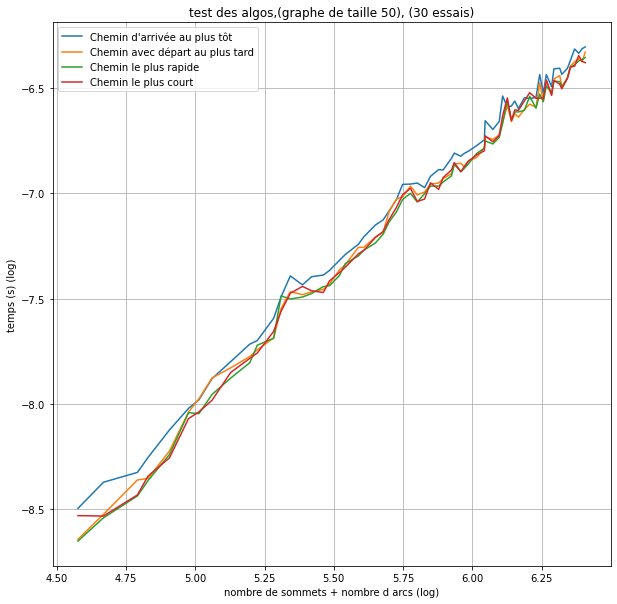

In [39]:
(nb_sommets,scores)=test_complexite_arcs(50,0.0125,0.90,30)

### Estimation du coefficient directeur (si affine)

In [40]:
a=nb_sommets[20:-20]
b=scores[20:-20].T[3]
tmp_a=a[-4:]-a[:4]
tmp_b=b[-4:]-b[:4]
moy=np.mean(tmp_b/tmp_a)
print(moy)

1.1715771299123698


### Tests avec GUROBI

In [26]:
def test_complexite_sommets_GUROBI(p_arcs,pas,taillemax,nb_essais):
    res_nb_sommets=[]
    res_score=[]
    #res_taille_g=[]
    for k in range(10,taillemax+1,pas):
        
        GUROBI=0
        
        nb_arcs=0
        nb_sommets=0
        for j in range(nb_essais):
            G_tmp={}
            while (len(G_tmp)==0):
                cpt_sommets,cpt_arcs,G_tmp=create_graph(k,p_arcs)
            
            nb_arcs+=cpt_arcs
            nb_sommets+=cpt_sommets
            g_tmp=transformaion_graphe(G_tmp)
            
            tmp_start="9999999999999999"
            tmp_end="0"
            fdqsfdsq=0
            for u in G_tmp:
                
                if int(u[0])<=int(tmp_start[0]):
                    tmp_start=u
                    
            for u in G_tmp:
                if int(u[0])>=int(tmp_end[0]):
                    tmp_end=u
            
            #leng+=len(G_tmp)
            
    
            
            
            
            start = time.time()
            fdqsfdsq+=1
            chemin_le_plus_court_gurobi(g_tmp,tmp_start,tmp_end)
            end = time.time()
            GUROBI+=(end - start)
            
        
        res_score.append(GUROBI/float(nb_essais))
        res_nb_sommets.append((nb_sommets/float(nb_essais))+(nb_arcs/float(nb_essais)))
        #res_taille_g.append(leng/float(nb_essais))
    
    l1="Chemin d'arrivée au plus tôt"
    l2="Chemin avec départ au plus tard"
    l3="Chemin le plus rapide"
    l4="Chemin le plus court"
    plt.plot(np.log(np.array(res_nb_sommets)),np.log(np.array(res_score)),label=["gurobi"])  
    #plt.plot(res_nb_sommets, res_taille_g)  # Plot some data on the (implicit) axes.
    plt.xlabel("nombre de sommets + nombre d arcs log")
    plt.ylabel('temps (s) log')
    plt.title("test gurobi, (p="+str(p_arcs)+") ("+str(nb_essais)+" essais)")
    plt.legend()
    plt.grid()
    plt.savefig('graphiques/gurobi_sommets')
    
    return (np.log(res_nb_sommets), np.log(np.array(res_score)))

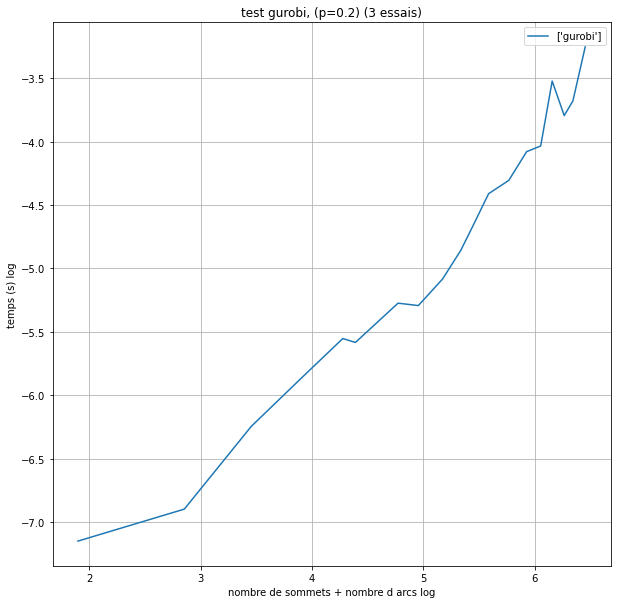

In [27]:
(nb_sommets,scores)=test_complexite_sommets_GUROBI(0.2000,5,100,3)

In [28]:
def test_complexite_arcs_gurobi(taille,pas,max_p_arcs,nb_essais):
    res_nb_sommets=[]
    res_score=[]
    #res_taille_g=[]
    tab_iter=np.arange (0.1,max_p_arcs,pas)
    for k in tab_iter:
        Gurobi=0
        #leng=0
        nb_arcs=0
        nb_sommets=0
        for j in range(nb_essais):
            G_tmp={}
            
            while (len(G_tmp)==0):
                cpt_sommets,cpt_arcs,G_tmp=create_graph(taille,k)
            
            nb_arcs+=cpt_arcs
            nb_sommets+=cpt_sommets
            g_tmp=transformaion_graphe(G_tmp)
            
            tmp_start="9999999999999999"
            tmp_end="0"
            fdqsfdsq=0
            for u in G_tmp:
                
                if int(u[0])<=int(tmp_start[0]):
                    tmp_start=u
                    
            for u in G_tmp:
                if int(u[0])>=int(tmp_end[0]):
                    tmp_end=u
            
            #leng+=len(G_tmp)
            
    
            
            
            start = time.time()
            chemin_le_plus_court_gurobi(g_tmp,tmp_start,tmp_end)
            end = time.time()
            Gurobi+=(end - start)
            
            
        
        res_score.append(Gurobi/float(nb_essais))
        res_nb_sommets.append((nb_sommets/float(nb_essais))+(nb_arcs/float(nb_essais)))
        #res_taille_g.append(leng/float(nb_essais))
    
    l1="Chemin d'arrivée au plus tôt"
    l2="Chemin avec départ au plus tard"
    l3="Chemin le plus rapide"
    l4="Chemin le plus court"
    plt.plot(np.log(np.array(res_nb_sommets)),np.log(np.array(res_score)),label=["Gurobi"])  
    #plt.plot(res_nb_sommets, res_taille_g)  # Plot some data on the (implicit) axes.
    plt.xlabel("nombre de sommets + nombre d arcs log")
    plt.ylabel('temps (s) log')
    plt.title("test de Gurobi,(graphe de taille "+str(taille)+"), ("+str(nb_essais)+" essais)")
    plt.legend()
    plt.grid()
    plt.savefig('graphiques/gurobi_arcs')
    return (np.log(np.array(res_nb_sommets)), np.log(np.array(res_score)))

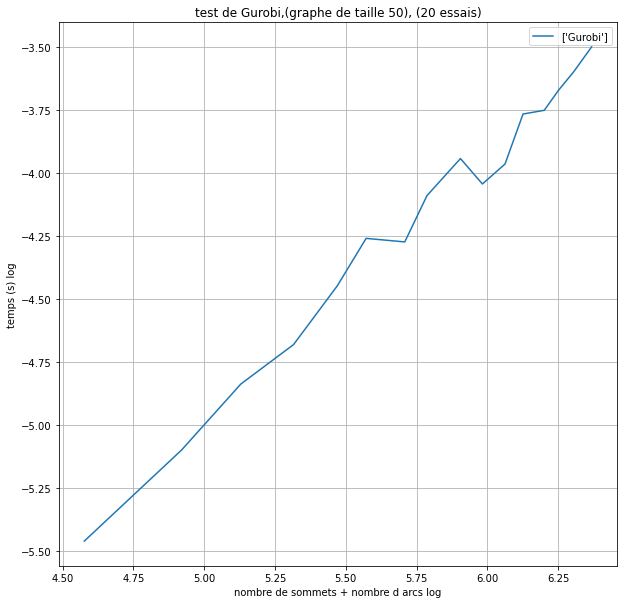

In [29]:
(nb_sommets,scores)=test_complexite_arcs_gurobi(50,0.05,0.90,20)

## Question 7 - Comparaison des algos Python vs. Gurobi

In [30]:
def test_complexite_sommets_VS_GUROBI(p_arcs,pas,taillemax,nb_essais):
    res_nb_sommets=[]
    res_score=[]
    #res_taille_g=[]
    for k in range(10,taillemax+1,pas):
        PYTHON=0
        GUROBI=0
        
        nb_arcs=0
        nb_sommets=0
        for j in range(nb_essais):
            G_tmp={}
            while (len(G_tmp)==0):
                cpt_sommets,cpt_arcs,G_tmp=create_graph(k,p_arcs)
            
            nb_arcs+=cpt_arcs
            nb_sommets+=cpt_sommets
            g_tmp=transformaion_graphe(G_tmp)
            
            tmp_start="9999999999999999"
            tmp_end="0"
            fdqsfdsq=0
            for u in G_tmp:
                
                if int(u[0])<=int(tmp_start[0]):
                    tmp_start=u
                    
            for u in G_tmp:
                if int(u[0])>=int(tmp_end[0]):
                    tmp_end=u
            
            #leng+=len(G_tmp)
            
    
            
            
            start = time.time()
            res=chemin_le_plus_court(g_tmp,tmp_start,tmp_end)
            end = time.time()
            PYTHON+=(end - start)
            start = time.time()
            chemin_le_plus_court_gurobi(g_tmp,tmp_start,tmp_end)
            end = time.time()
            GUROBI+=(end - start)
            
        
        res_score.append((PYTHON/float(nb_essais),GUROBI/float(nb_essais)))
        res_nb_sommets.append((nb_sommets/float(nb_essais))+(nb_arcs/float(nb_essais)))
        #res_taille_g.append(leng/float(nb_essais))
    
    plt.plot(res_nb_sommets,res_score,label=["4.4","gurobi"])  
    #plt.plot(res_nb_sommets, res_taille_g)  # Plot some data on the (implicit) axes.
    plt.xlabel("nombre de sommets + nombre d arcs ")
    plt.ylabel('temps (s) ')
    plt.title("test des algos, (p="+str(p_arcs)+") ("+str(nb_essais)+" essais)")
    plt.legend()
    plt.grid()
    plt.savefig('graphiques/gurobi_vs_python_sommets')
    
    return (np.log(res_nb_sommets), np.log(np.array(res_score)))

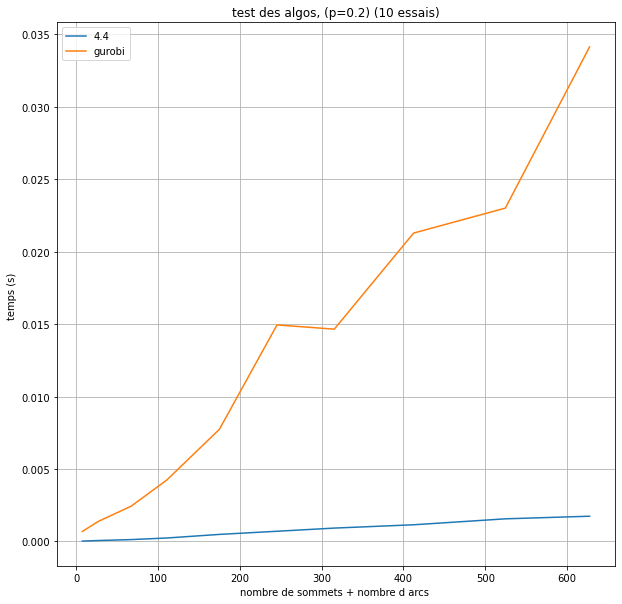

In [31]:
(nb_sommets,scores)=test_complexite_sommets_VS_GUROBI(0.2000,10,100,10)

In [32]:
def test_complexite_VS_GUROBI(taille,pas,max_p_arcs,nb_essais):
    res_nb_sommets=[]
    res_score=[]
    #res_taille_g=[]
    tab_iter=np.arange (0.1,max_p_arcs,pas)
    for k in tab_iter:
        Gurobi=0
        python=0
        #leng=0
        nb_arcs=0
        nb_sommets=0
        for j in range(nb_essais):
            G_tmp={}
            
            while (len(G_tmp)==0):
                cpt_sommets,cpt_arcs,G_tmp=create_graph(taille,k)
            
            nb_arcs+=cpt_arcs
            nb_sommets+=cpt_sommets
            g_tmp=transformaion_graphe(G_tmp)
            
            tmp_start="9999999999999999"
            tmp_end="0"
            fdqsfdsq=0
            for u in G_tmp:
                
                if int(u[0])<=int(tmp_start[0]):
                    tmp_start=u
                    
            for u in G_tmp:
                if int(u[0])>=int(tmp_end[0]):
                    tmp_end=u
            
            #leng+=len(G_tmp)
            
    
            
            
            start = time.time()
            res=chemin_le_plus_court(g_tmp,tmp_start,tmp_end)
            end = time.time()
            python+=(end - start)
            
            start = time.time()
            chemin_le_plus_court_gurobi(g_tmp,tmp_start,tmp_end)
            end = time.time()
            Gurobi+=(end - start)
            
            
        
        res_score.append((python/float(nb_essais),Gurobi/float(nb_essais)))
        res_nb_sommets.append((nb_sommets/float(nb_essais))+(nb_arcs/float(nb_essais)))
        #res_taille_g.append(leng/float(nb_essais))
    
    plt.plot(res_nb_sommets,res_score,label=["4.4","gurobi"])  
    #plt.plot(res_nb_sommets, res_taille_g)  # Plot some data on the (implicit) axes.
    plt.xlabel("nombre de sommets + nombre d arcs ")
    plt.ylabel('temps (s) ')
    plt.title("test des algos,(graphe de taille "+str(taille)+"), ("+str(nb_essais)+" essais)")
    plt.legend()
    plt.grid()
    plt.savefig('graphiques/gurobi_vs_python_arcs')
    return (np.log(np.array(res_nb_sommets)), np.log(np.array(res_score)))

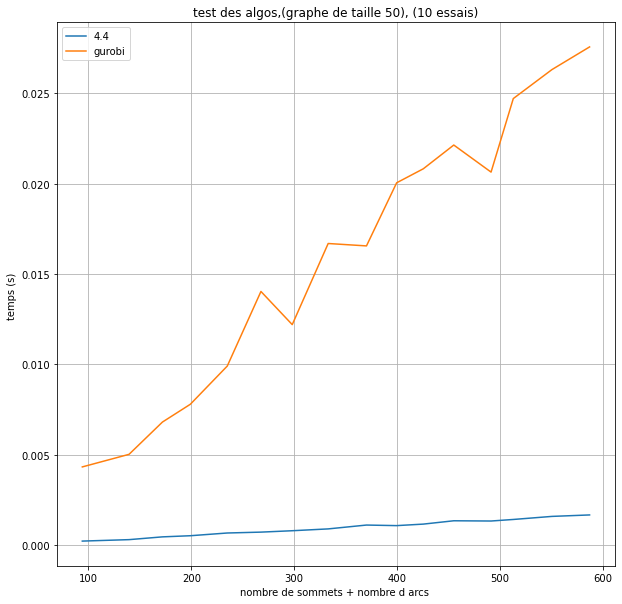

In [33]:
(nb_sommets,scores)=test_complexite_VS_GUROBI(50,0.05,0.90,10)